#### Thông tin sinh viên

> Họ Tên: Nguyễn Đức Chí Danh <br>
> MSSV: N20DCCN009 <br>
> Lớp: D20CQCNHT01-N <br>


In [2]:
import numpy as np
import scipy.io
import cv2
import matplotlib.pyplot as plt

## Homework3


### 1. Obtain the image “Mammogram.bin” from the course web site. This image has 256 256 pixels. Each pixel has 8 bits. Note: the server is Unix; the filename is case sensitive. Do not make the mistake of getting the incorrect 512 512 file “mam-mogram.bin.”


(256, 256)


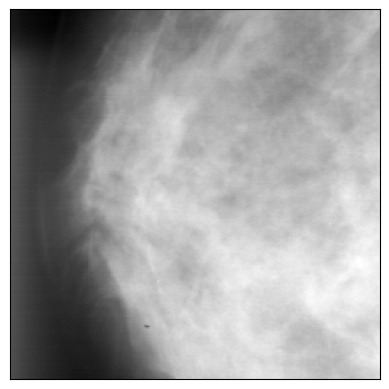

In [3]:
image_mamogram = np.fromfile('dataset/mammogram_1.bin', dtype=np.uint8).reshape(256, 256)
plt.xticks([])
plt.yticks([])
print(image_mamogram.shape)
plt.imshow(image_mamogram,cmap='gray')

#### (a)

> There are two main regions in the input image: the imaged tissue and the dark
> background region on the left side of the image. Write a program to convert this
> gray scale image into a binary image by simple thresholding. In the binary image,
> use a value of 255 = 0xff for logical one and a value of 0 = 0x00 for logical zero.
> Select the threshold so that the binary image is equal to logical zero over the
> background region and logical one over the tissue


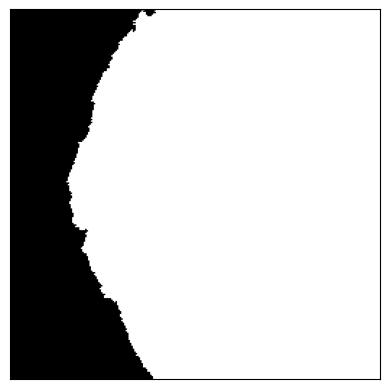

In [4]:
thresh = 95
(thresh, imshow) = cv2.threshold(image_mamogram, thresh, 255, cv2.THRESH_BINARY)
plt.xticks([])
plt.yticks([])
plt.imshow(imshow, cmap='gray')

In [5]:
imshow = imshow/ 255

#### (b)

> Write a program to implement the Approximate Contour Image Generation algorithm given on page 2.104 of the notes. Your program should input the binary
> image and output a binary contour image. Run your program to generate an
> appoximate contour image from the binary image you obtained by thresholding
> Mammogram.bin


In [6]:
def ApproximateContourImageGenerator(image_bin):
    width = image_bin.shape[0]
    height = image_bin.shape[1]
    step_moves = [(0,1), (0,-1), (-1, 0), (1,0)]
    output_img = np.zeros((width, height))
    for i in range(width):
        for j in range(height):
            if image_bin[i,j] == 0:
                for step in step_moves:
                    in_i, in_j = (i + step[0], j + step[1])
                    if in_i >= 0 and in_i < width and in_j >= 0 and in_j < height:
                        if image_bin[in_i, in_j] == 1:
                            output_img[i,j] = 1
                            break
    return output_img


([], [])

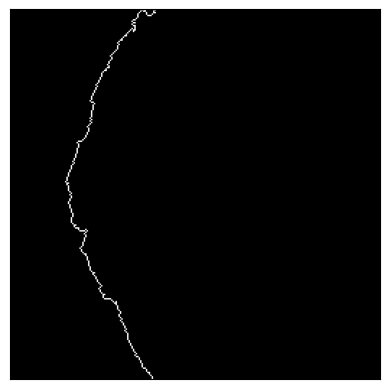

In [7]:
plt.imshow(ApproximateContourImageGenerator(imshow), cmap='gray')
plt.xticks([])
plt.yticks([])

<a href="https://coecs.ou.edu/Joseph.P.Havlicek/ece5273/notes/Module-2JH.pdf">src algorithm</a>

#### c
> Could a chain code be used to represent the main contour in your contour image?
Why or why not?

Không thể vì thuật toán dựa vào neighbor của hình ảnh để xác định các contour, nếu đưa hình ảnh contour vào tiếp nó sẽ không xác định được hình ảnh

### 2. Obtain the image “lady.bin” from the course web site. This is a 256 256 gray scale
image with 8-bit pixels. Plot a histogram for the image. Write a program to perform
a full-scale contrast stretch on the image and plot a histogram for the result

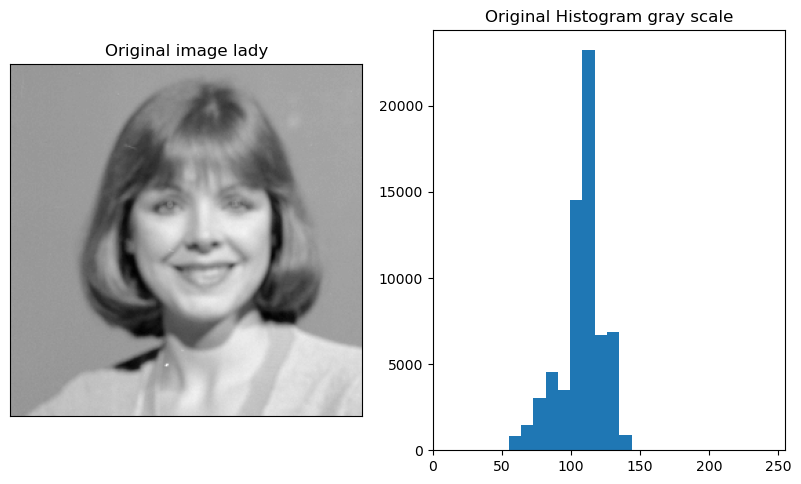

In [178]:
image_lady = np.fromfile('dataset/lady.bin', dtype=np.uint8).reshape(256, 256)
plt.figure(4, figsize=(10,12))
plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.title("Original image lady")
plt.imshow(image_lady, cmap='gray')

plt.subplot(2,2,2)
histogram = plt.hist(image_lady.reshape(-1))
plt.xlim([0, 255])
plt.title("Original Histogram gray scale")
plt.show()



In [28]:
def full_scale_constrast_stretch(image_in):
    image_out = image_in.copy()
    min_value_a = np.min(image_out)
    max_value_b = np.max(image_out)

    min_value_c = np.percentile(image_in, 5)
    max_value_d = np.percentile(image_in, 95)

    return (image_out - min_value_c) * ((max_value_b - min_value_a) / (max_value_d - min_value_c)) + min_value_a


(0.0, 255.0)

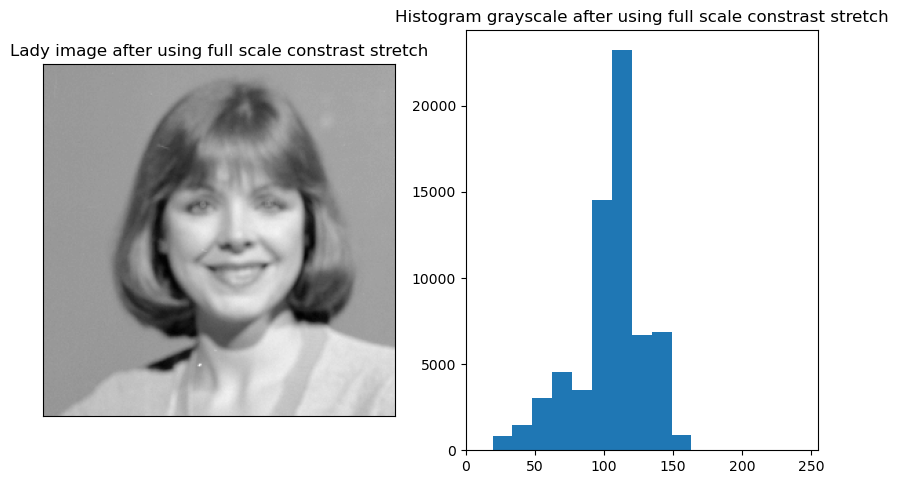

In [179]:
image_constrast = full_scale_constrast_stretch(image_in=image_lady)
plt.figure(4, figsize=(10, 12))
plt.subplot(2,2, 1)
plt.xticks([])
plt.yticks([])
plt.title("Lady image after using full scale constrast stretch")
plt.imshow(image_constrast, cmap='gray')

plt.subplot(2,2,2)
plt.title("Histogram grayscale after using full scale constrast stretch")
histogram_constrast = plt.hist(image_constrast.reshape(-1))
plt.xlim([0,255])

<a href="https://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm?fbclid=IwAR1iq2LFcdFnl1GW3Ayk8EtHkw6cOxQ_FsHd-CXuudmFI-27WB8fle01AcI">Link algorithm</a>

### 3 .Obtain the image “actontBin.bin” from the course web site. This image has 256x256 pixels with 8 bits each. It is a true binary image; the pixel value 255 represents logical one and the pixel value 0 represents logical zero.

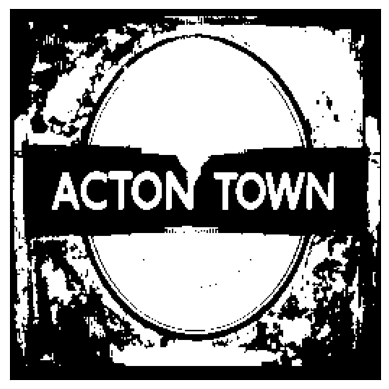

In [180]:
action_image = np.fromfile('dataset/actontBin.bin', dtype=np.uint8).reshape(256, 256)
plt.xticks([])
plt.yticks([])
plt.imshow(action_image, cmap='gray')

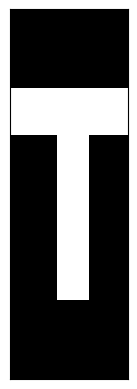

In [181]:
def draw_a_T_shape():
    height = 47
    width = 15

    small_image = np.zeros((height, width))
    #|
    small_image[16:37, 6:10] = 255
    #-
    small_image[10:16, :] = 255
    return small_image

t_shape_template = draw_a_T_shape()
plt.xticks([])
plt.yticks([])
plt.imshow(t_shape_template, cmap='gray')

(210, 242)


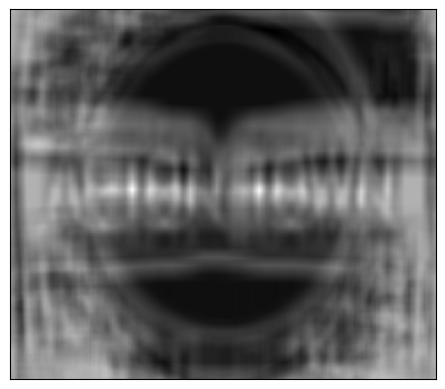

In [163]:
def binary_match(image_i, image_j):
    #xnor function 
    width_j, height_j = image_j.shape
    width_i, height_i = image_i.shape
    j1 = np.zeros((width_i - width_j + 1, height_i - height_j + 1))
    for i in range(j1.shape[0]):
        for j in range(j1.shape[1]):
            #j1[i, j] = np.all(~ np.logical_xor(image_i[i:i+width_j, j:j+height_j], image_j))
            region_i = image_i[i:i+width_j, j:j+height_j]
            match = np.logical_not(np.logical_xor(region_i, image_j))
            j1[i, j] = np.sum(match)
    return j1

j1 = binary_match(action_image, t_shape_template)
plt.xticks([])
plt.yticks([])
print(j1.shape)
plt.imshow(j1, cmap='gray') 
plt.show()


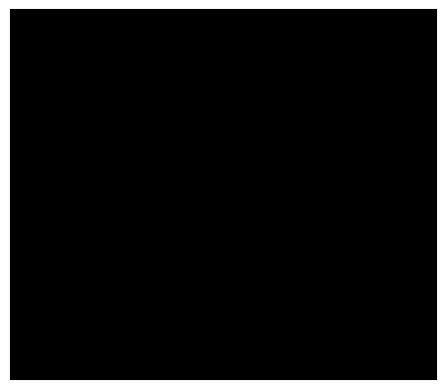

In [164]:
thresh_t = 30
_,J2 = cv2.threshold(j1, thresh_t, 255, cv2.THRESH_BINARY)
plt.xticks([])
plt.yticks([])
plt.imshow(J2, cmap='gray')

### 4. Obtain the image “johnny.bin” from the course web site. This image has 256 256 pixels. Each pixel has 8 bits. Plot the histogram of the original image. Write a program to perform histogram equalization on this image. Show the equalized image and plot its histogram

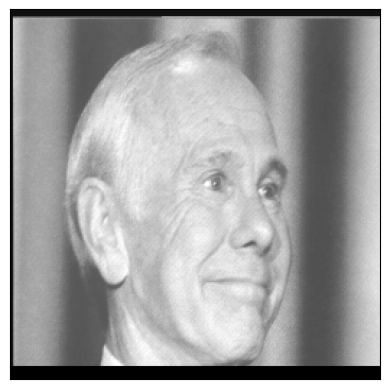

In [166]:
jonhy_img = np.fromfile('dataset/johnny.bin', dtype=np.uint8).reshape(256, 256)
plt.xticks([])
plt.yticks([])
plt.imshow(jonhy_img, cmap='gray')

In [174]:
equalize_jonhy_image = cv2.equalizeHist(jonhy_img)


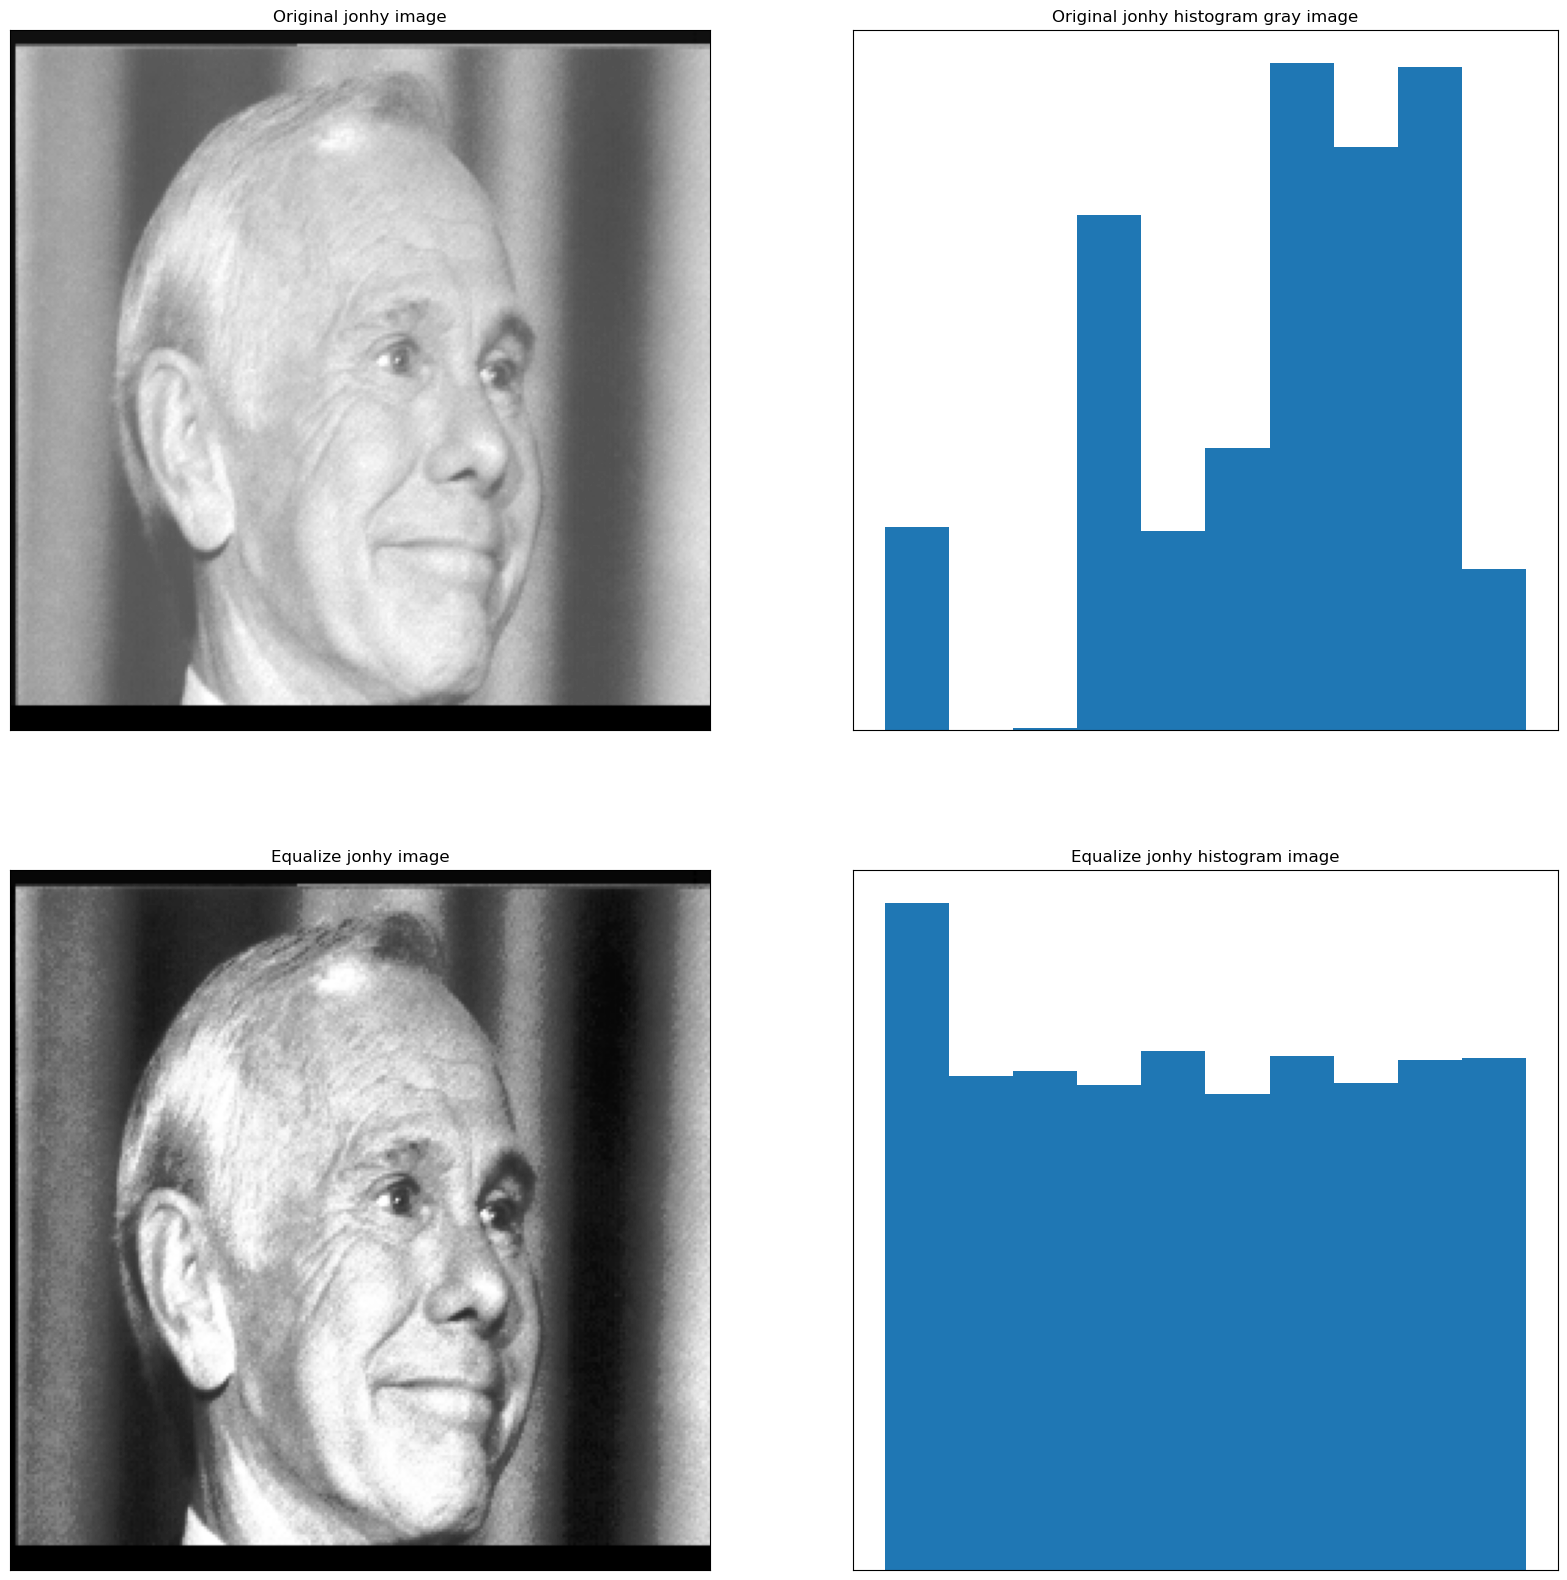

In [177]:
plt.figure(6, figsize=(20, 20))
plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.title("Original jonhy image")
plt.imshow(jonhy_img, cmap='gray')

plt.subplot(2,2,2)
plt.xticks([])
plt.yticks([])
plt.title("Original jonhy histogram gray image")
plt.hist(jonhy_img.reshape(-1))

plt.subplot(2,2,3)
plt.xticks([])
plt.yticks([])
plt.title("Equalize jonhy image")
plt.imshow(equalize_jonhy_image, cmap='gray')

plt.subplot(2,2,4)
plt.xticks([])
plt.yticks([])
plt.title("Equalize jonhy histogram image")
plt.hist(equalize_jonhy_image.reshape(-1))

plt.show()